# <center style='color:rgb(25,23,124)'>Traffic Signs Recognition Project</center>

# Import the Required Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
from numpy import random
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
import os
os.chdir("D://traffic-signs-recognition-main//Data")
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from IPython.display import display

# Train CSV file EDA/analysis

#### 1.Load the Train CSV File

In [2]:
df = pd.read_csv("./Train.csv")  # Loading Train Data
df1=pd.read_csv("./Test.csv")

In [3]:
df.head()  # Printing Top Five ROWs

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png

In [4]:
df1.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png

#### 2.Display the Info of Train.csv File

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


#### 3.Display the Column of Train.csv File

In [6]:
df.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

#### 4.Describe the Train.csv file

In [7]:
df.describe()

Width        Height        Roi.X1        Roi.Y1        Roi.X2  \
count  39209.000000  39209.000000  39209.000000  39209.000000  39209.000000   
mean      50.835880     50.328930      5.999515      5.962381     45.197302   
std       24.306933     23.115423      1.475493      1.385440     23.060157   
min       25.000000     25.000000      0.000000      5.000000     20.000000   
25%       35.000000     35.000000      5.000000      5.000000     29.000000   
50%       43.000000     43.000000      6.000000      6.000000     38.000000   
75%       58.000000     58.000000      6.000000      6.000000     53.000000   
max      243.000000    225.000000     20.000000     20.000000    223.000000   

             Roi.Y2       ClassId  
count  39209.000000  39209.000000  
mean      44.728379     15.788390  
std       21.971145     12.013238  
min       20.000000      0.000000  
25%       30.000000      5.000000  
50%       38.000000     12.000000  
75%       52.000000     25.000000  
max      205.000000     42.000000

#### 5. Describe the Train.csv file

In [8]:
df.isna().sum()

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

#### 4.Print the Heatmap of Attributes in Train.csv File

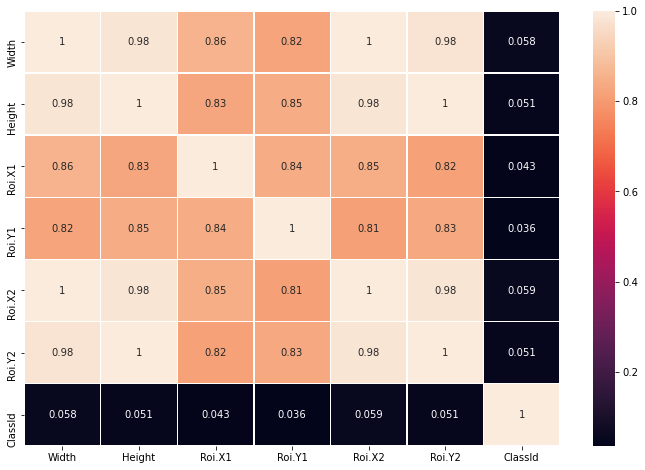

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), linewidths=.5,annot=True)


In [13]:
# Path to raw data

data_path = "./Train"

# Listing sub directories

sub_directories = os.listdir(data_path)

# Loading labels
class_labels = pd.read_csv("./labels.csv")

In [14]:
# Finding number of classes in the data

print("Number of Classes: ",len(sub_directories))

Number of Classes:  43


In [15]:
# Finding number of images under each class

no_of_images = []
for directory in sub_directories:
    no_of_images.append(len(os.listdir(os.path.join(data_path, directory))))

class_labels["n_samples"] = no_of_images
class_labels.sort_values(["ClassId"], inplace=True)

# Displaying DataFrame containing class name, directory name and number of samples 
display(class_labels)

ClassId                                               Name  n_samples
0         0                               Speed limit (20km/h)        210
1         1                               Speed limit (30km/h)       2220
2         2                               Speed limit (50km/h)       2010
3         3                               Speed limit (60km/h)       1320
4         4                               Speed limit (70km/h)       2100
5         5                               Speed limit (80km/h)       2160
6         6                        End of speed limit (80km/h)        780
7         7                              Speed limit (100km/h)        630
8         8                              Speed limit (120km/h)        420
9         9                                         No passing       1110
10       10       No passing for vechiles over 3.5 metric tons       1200
11       11              Right-of-way at the next intersection        210
12       12                                      Priority road       2250
13       13                                              Yield        360
14       14                                               Stop        330
15       15                                        No vechiles        390
16       16           Vechiles over 3.5 metric tons prohibited        510
17       17                                           No entry        270
18       18                                    General caution       1500
19       19                        Dangerous curve to the left        600
20       20                       Dangerous curve to the right        240
21       21                                       Double curve        540
22       22                                         Bumpy road        270
23       23                                      Slippery road       1410
24       24                          Road narrows on the right        450
25       25                                          Road work        780
26       26                                    Traffic signals        240
27       27                                        Pedestrians        689
28       28                                  Children crossing        420
29       29                                  Bicycles crossing       1200
30       30                                 Beware of ice/snow        390
31       31                              Wild animals crossing        210
32       32                End of all speed and passing limits       2070
33       33                                   Turn right ahead        300
34       34                                    Turn left ahead       1980
35       35                                         Ahead only        360
36       36                               Go straight or right        240
37       37                                Go straight or left        240
38       38                                         Keep right       1860
39       39                                          Keep left        420
40       40                               Roundabout mandatory       1440
41       41                                  End of no passing       1410
42       42  End of no passing by vechiles over 3.5 metric ...       1470

There are 43 diffrent images and classes.

In [16]:
#Checking class distribution in train data
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((25,10))
sns.countplot(data = df, x = 'ClassId', )
plt.show()

### Observations :
The target classes are clearly not uniformly distributed.

This is quite logical since some signs like "Keep speed below 30Kmph" or "A bump ahead" appears more often then signs like "Road under construction ahead".

Also, for most of the classes, the imbalance is not severe.

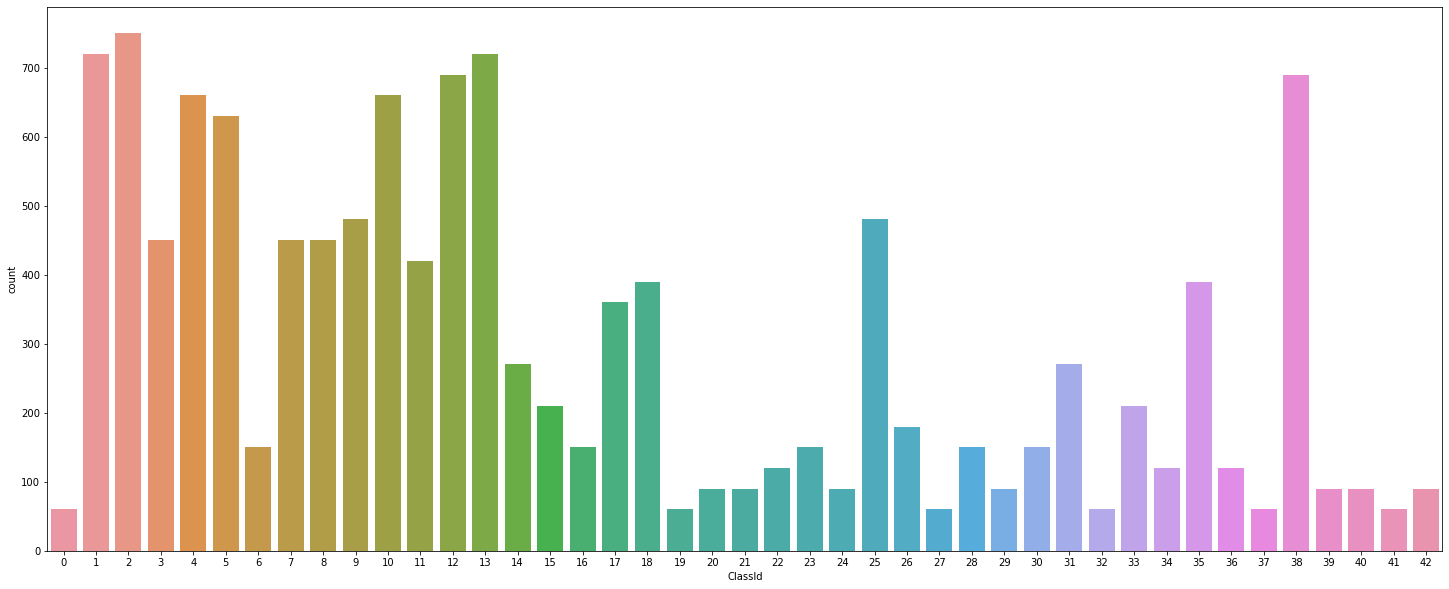

In [17]:
#Checking class distribution in test data
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((25,10))
sns.countplot(data = df1, x = 'ClassId', )
plt.show()

### Observations :
The observations for test data are quite similer to that of the train data.

Here also some classes are more frequent as compared to the others.

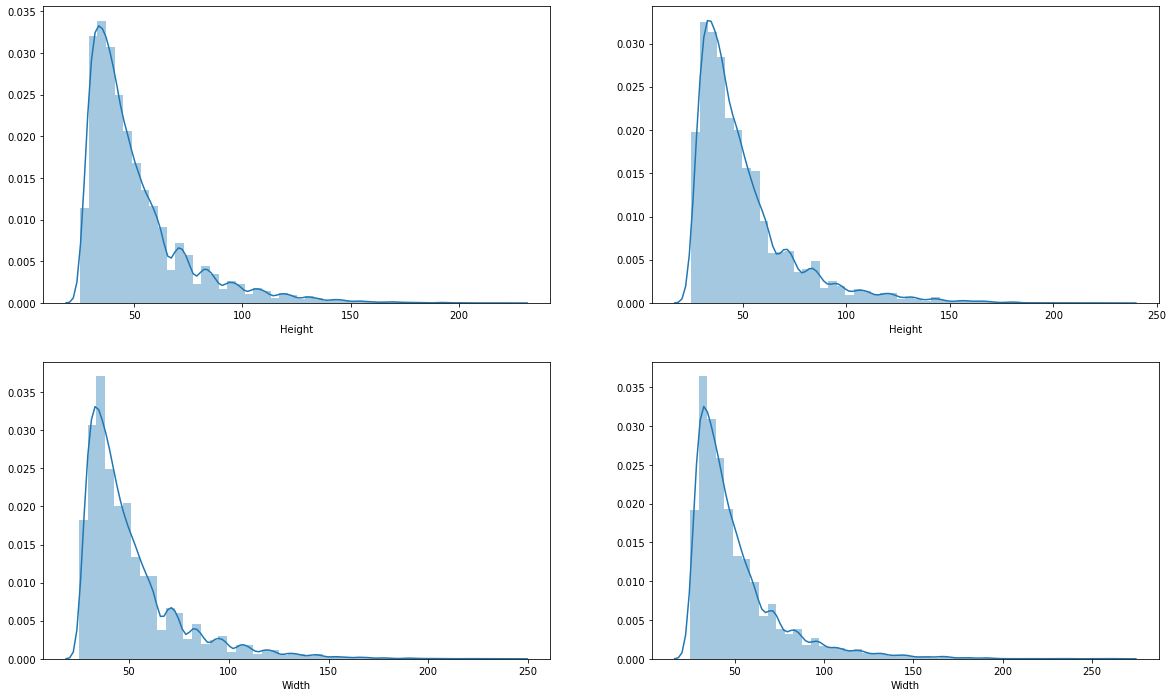

In [18]:
#Distplot for Height and Width of images in train data

fig, ax = plt.subplots(2, 2)
fig.set_size_inches((20,12))
sns.distplot(df['Height'], ax = ax[0][0])
fig.set_size_inches((20,12))
sns.distplot(df1['Height'], ax = ax[0][1])
fig.set_size_inches((20,12))
sns.distplot(df['Width'], ax = ax[1][0])
fig.set_size_inches((20,12))
sns.distplot(df1['Width'], ax = ax[1][1])
plt.show()

### Observations :
   It is evident from the above figures that both our train and test set images follow similer Height and Width distribution.
   
Since all the images have different dimensions, we need to fix the height and width constant for every image to follow.

We need to perform this in such a way that data loss is least.

For smaller images, we will need to do appropriate padding.

# Display the Images

#### Original images in Meta Folder With Name.

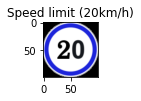

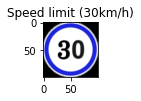

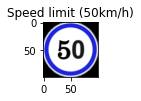

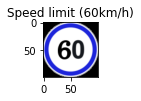

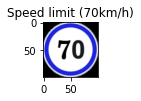

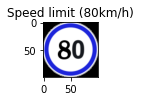

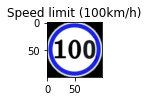

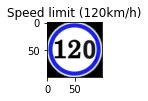

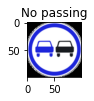

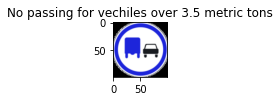

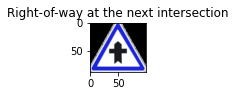

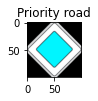

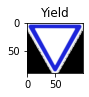

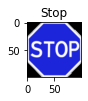

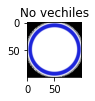

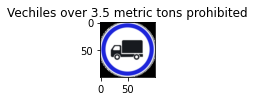

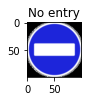

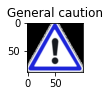

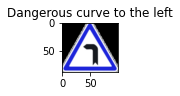

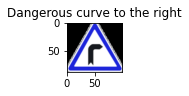

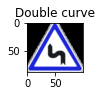

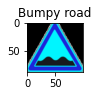

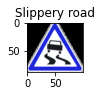

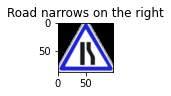

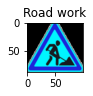

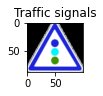

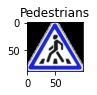

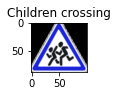

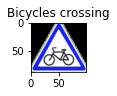

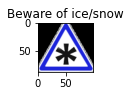

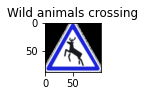

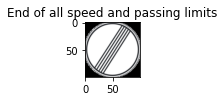

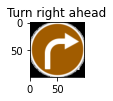

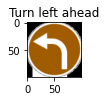

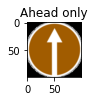

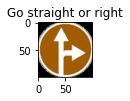

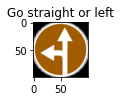

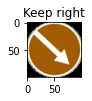

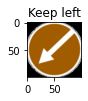

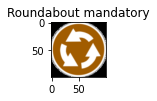

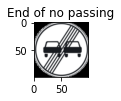

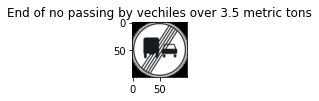

In [19]:

classes=43
for i in range(0,classes):
    try:
        plt.figure(figsize=(1,1))
        path_img = r'D:\\traffic-signs-recognition-main\\Data\\meta'
        path_0 = os.path.join(path_img,str(i))
        path_train = path_0 + ".png"
        img = cv2.imread(path_train)
        plt.imshow(img)
        plt.title(class_labels["Name"][int(i)], fontsize=12)
        plt.show()
    except Exception as e:
        print(F"Image {i}.png not Found ")

#### Processed images in Meta Folder

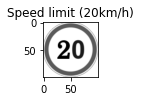

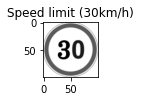

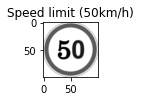

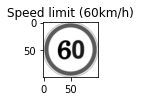

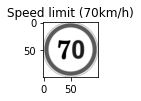

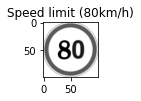

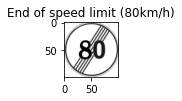

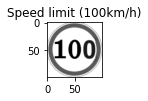

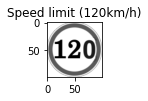

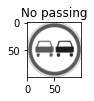

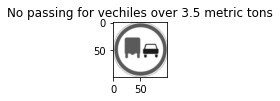

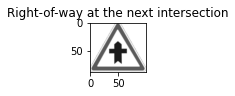

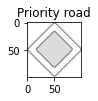

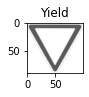

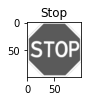

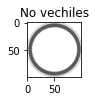

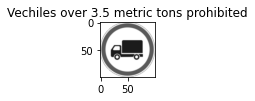

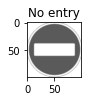

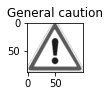

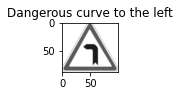

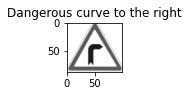

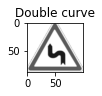

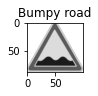

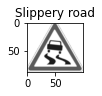

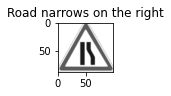

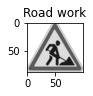

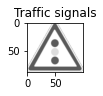

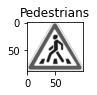

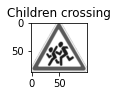

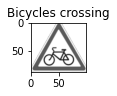

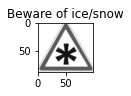

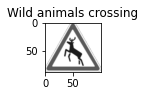

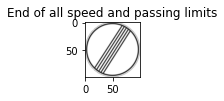

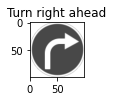

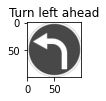

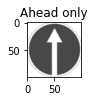

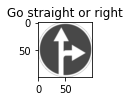

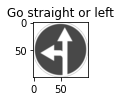

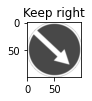

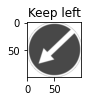

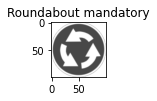

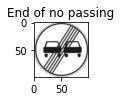

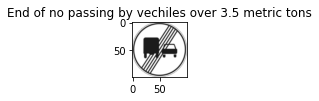

In [20]:
for i in range(0,classes):
    try:
        plt.figure(figsize=(1,1))
        path_img = r'D:\\traffic-signs-recognition-main\\Data\\meta'
        path_0 = os.path.join(path_img,str(i))
        path_train = path_0 + ".png"
        img = Image.open(path_train).convert('LA')
        plt.imshow(img)
        plt.title(class_labels["Name"][int(i)], fontsize=12)
        plt.show()
    except Exception as e:
        print(F"Image {i}.png not Found ")

### Create Container for Processed Data

In [21]:
data = []
labels = []

### Get the Current Path Data

In [22]:
cur_path = os.getcwd()
cur_path

'D:\\traffic-signs-recognition-main\\Data'

#### Printing Sample images in Train Folder

210


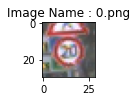

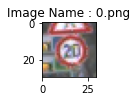

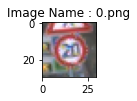

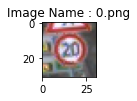

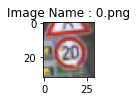

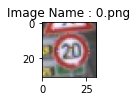

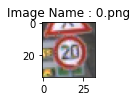

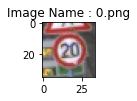

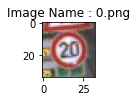

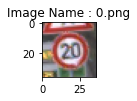

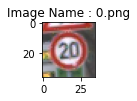

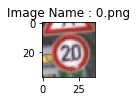

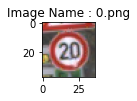

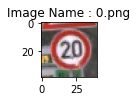

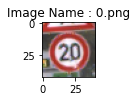

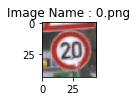

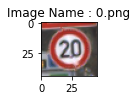

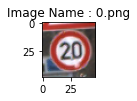

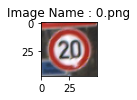

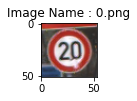

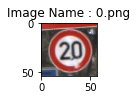

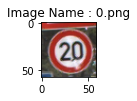

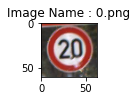

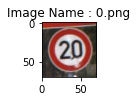

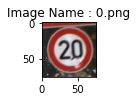

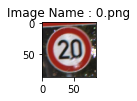

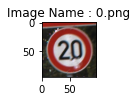

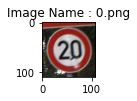

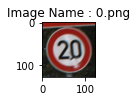

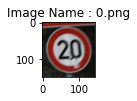

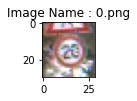

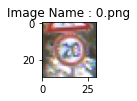

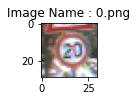

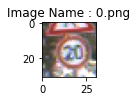

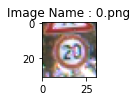

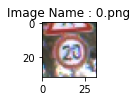

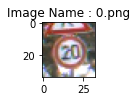

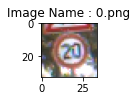

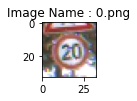

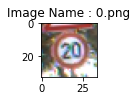

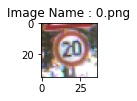

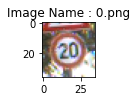

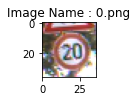

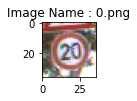

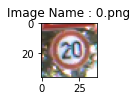

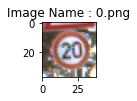

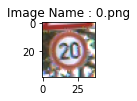

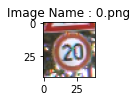

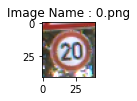

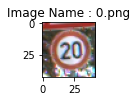

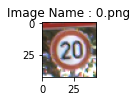

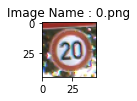

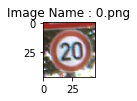

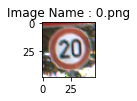

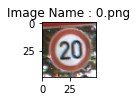

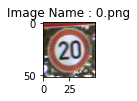

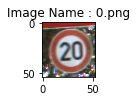

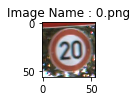

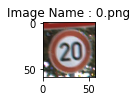

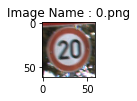

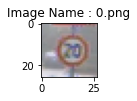

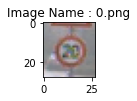

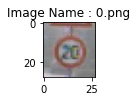

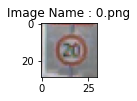

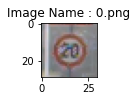

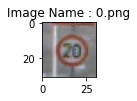

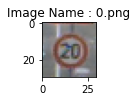

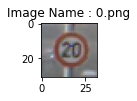

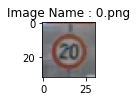

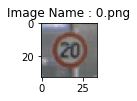

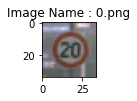

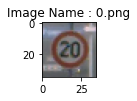

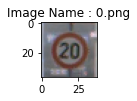

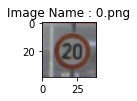

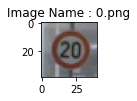

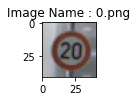

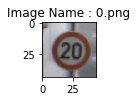

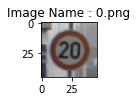

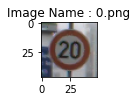

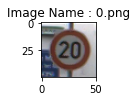

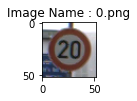

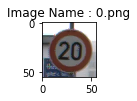

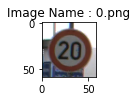

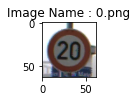

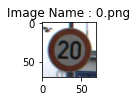

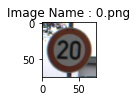

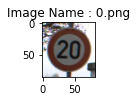

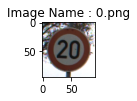

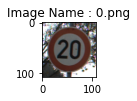

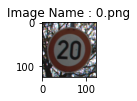

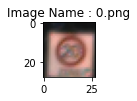

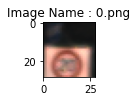

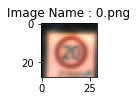

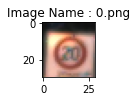

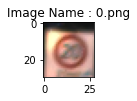

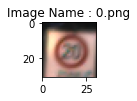

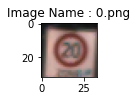

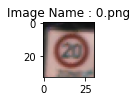

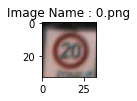

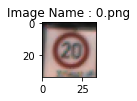

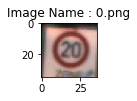

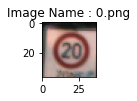

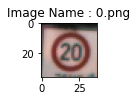

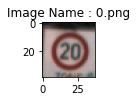

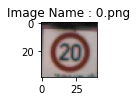

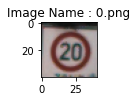

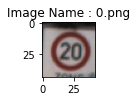

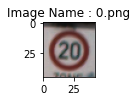

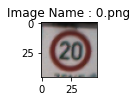

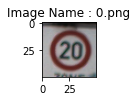

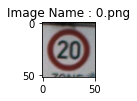

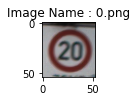

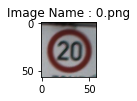

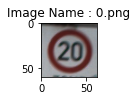

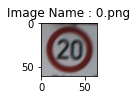

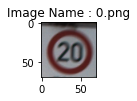

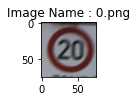

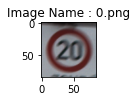

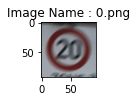

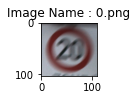

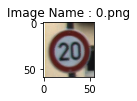

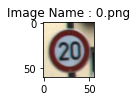

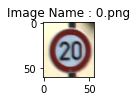

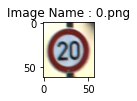

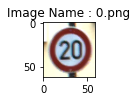

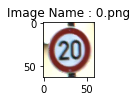

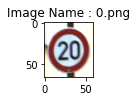

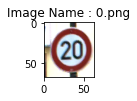

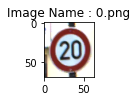

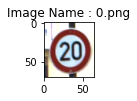

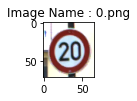

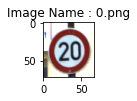

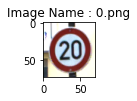

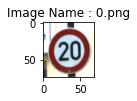

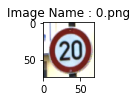

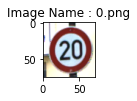

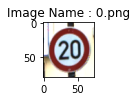

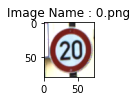

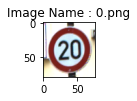

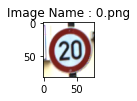

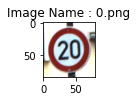

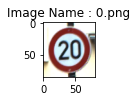

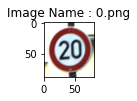

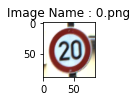

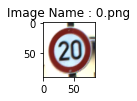

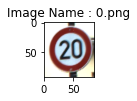

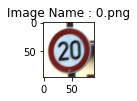

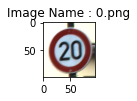

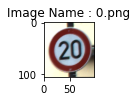

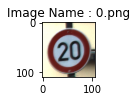

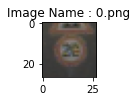

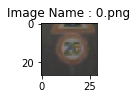

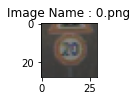

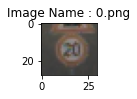

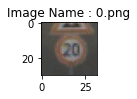

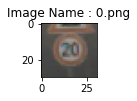

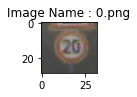

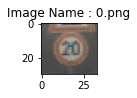

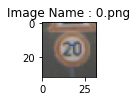

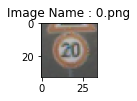

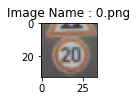

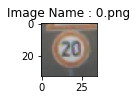

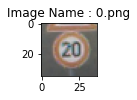

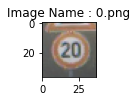

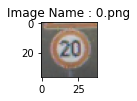

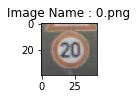

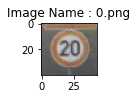

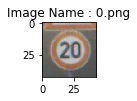

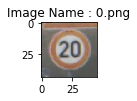

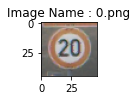

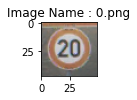

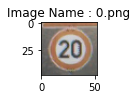

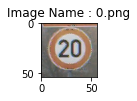

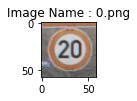

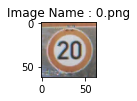

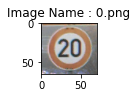

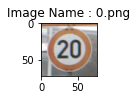

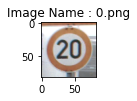

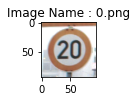

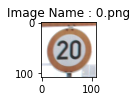

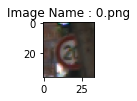

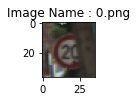

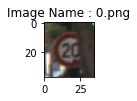

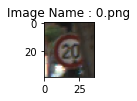

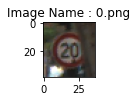

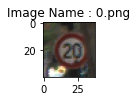

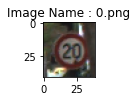

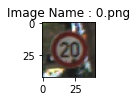

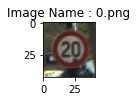

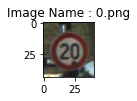

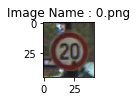

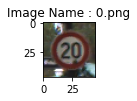

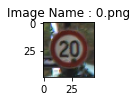

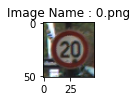

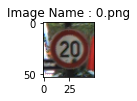

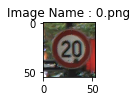

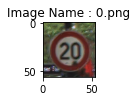

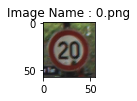

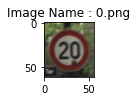

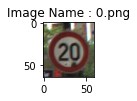

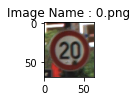

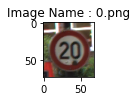

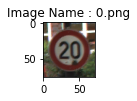

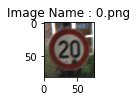

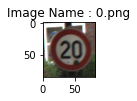

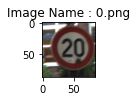

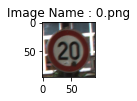

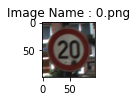

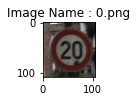

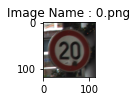

In [23]:
# Here we are just printing image for class lable 0.

for i in range(1):
    path = os.path.join(cur_path,"Train",str(i))   #Path recorded
    images = os.listdir(path)                      #Return a list containing the names of the files in the directory
    print(len(images))
    for a in images:
        try:
            images = Image.open(path+"\\"+a)
            plt.figure(figsize=(1,1))              #Opens and identifies the given image file.
            plt.imshow(images)                     #Display data as an image; i.e. on a 2D regular raster.
            plt.title(f"Image Name : {i}.png")     #Title for imagePlot
            plt.show()                             #show the image
        except Exception as e:
            print(e)

#### Printng the sample images from Test folder

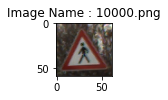

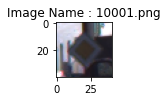

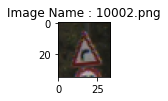

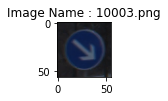

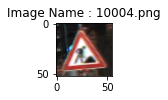

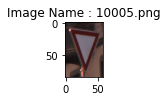

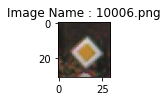

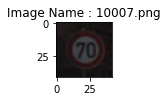

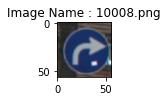

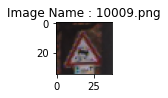

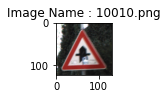

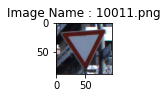

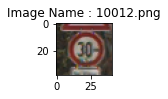

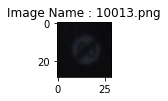

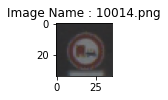

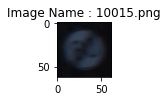

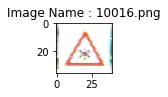

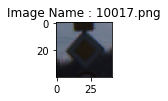

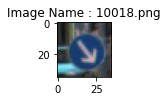

In [24]:
for i in range(10000,10019):
    try:
        path_img = r'D:\\traffic-signs-recognition-main\\Data\\Test\\'
        path_0 = os.path.join(path_img,str(i))
        path_test = path_0 + ".png"
        #print(path_test)
        images = Image.open(path_test)
        plt.figure(figsize=(1,1))
        plt.imshow(images)
        plt.title(f"Image Name : {i}.png")
        plt.show()     
    except Exception as e :
        print(F"Image {i}.png not Found ")

# Deep Learning

In [ ]:
# checking resolution of the images

res = cv2.imread(os.path.join(data_path, sub_directories[0], os.listdir(os.path.join(data_path, sub_directories[0]))[0])).shape
print("Height: ", res[0])
print("Width: ", res[1])
print("Number of Channels: ", res[2])
print("Resolution: {}x{}".format(res[0], res[1]))

here we have to change the resolution of the  Image

### Pre-process and Append the Images and Index in list

In [ ]:
for i in range(classes):
    path = os.path.join(cur_path,"Train",str(i)) #storing path corrsponding to each class of image
    #print(path)
    images = os.listdir(path)                    #storing names of files in directory
    #print(images)
    for a in images:
        try:
            image = Image.open(path+"\\"+a)      #creating object for each image
            image = image.resize((30,30))        #Change shape and size of array in-place by passing required size of image.
            image = np.array(image)              #storing  it into array
            #print(type(image))                      
            data.append(image)                   # Appending properties of images in container name data.
            labels.append(i)                     #also appending lables for each image.
        except Exception as e:
            print(e)

In [ ]:
data = np.array(data)
print(len(data))
labels = np.array(labels)
print(len(labels))

# Create the new directory

In [ ]:
try:
    os.mkdir('Training')
except OSError as e:
    print(f"File/Path alreay exits Already Exits at \npath/abs{os.getcwd()}")

# Save Labels & Data for future use

In [ ]:
np.save('./Training/data',data)
np.save('./Training/target',labels)

# Load data & Labels

In [2]:
data=np.load('./Training/data.npy')
labels=np.load('./Training/target.npy')

### Split the data into Split into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

### Print dimesions of Data and labels

In [ ]:
print(type(X_train),type(y_train))
print(data.shape, labels.shape)

### One Hot Encoding

In [ ]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

### Now it's time to build the model

In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs=20
from tensorflow import keras
checkpoint =tf.keras.callbacks.ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=1,save_best_only=True,mode='auto')
history=model.fit(X_train,y_train,batch_size=32,epochs=epochs,callbacks=[checkpoint],validation_split=0.2,validation_data=(X_test, y_test))

# Accuracy Testing

In [ ]:
plt.figure(0)                      
plt.plot(history.history['accuracy'], label='training accuracy') 
plt.plot(history.history['val_accuracy'], label='val accuracy')  
plt.title('Accuracy of Model')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Loss Testing

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Test the model

In [3]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [4]:
X_test, label = testing('Test.csv')


In [6]:
m= model.predict(X_test)


395/395 [==============================] - 6s 12ms/step


In [7]:
Y_pred = np.argmax(model.predict(X_test), axis=-1)


395/395 [==============================] - 5s 12ms/step


In [8]:
from sklearn.metrics import accuracy_score
#print("Traning Accuracy:",accuracy_score(X_train, y_train))
print("Testing Accuracy:",accuracy_score(label, Y_pred))

Testing Accuracy: 0.956215360253365


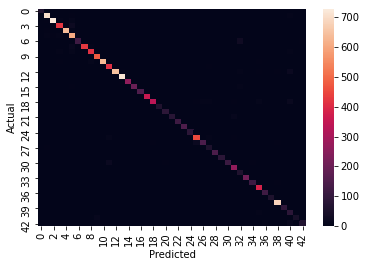

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.97      0.98      0.98       720
           2       0.99      0.97      0.98       750
           3       0.94      0.94      0.94       450
           4       1.00      0.97      0.98       660
           5       0.89      0.97      0.93       630
           6       0.98      0.79      0.87       150
           7       0.99      0.95      0.97       450
           8       0.95      0.92      0.94       450
           9       0.96      1.00      0.98       480
          10       1.00      0.96      0.98       660
          11       0.93      0.98      0.95       420
          12       1.00      0.94      0.97       690
          13       0.99      0.99      0.99       720
          14       1.00      0.97      0.99       270
          15       0.99      0.94      0.97       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [9]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data1 = {'y_Actual':np.array(label),
        'y_Predicted':np.array(Y_pred)}
df2 = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df2['y_Actual'], df2['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix)
plt.show()

#For classification report
from sklearn.metrics import classification_report
print(classification_report(label,Y_pred))

In [10]:
data.shape


(39209, 30, 30, 3)

In [11]:
labels.shape

(39209,)

In [12]:
X_test.shape


(12630, 30, 30, 3)

In [13]:
label.shape

(12630,)

# Machine Learning

In [5]:
#Importing libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [6]:
newdatatrain=data.reshape(data.shape[0],data.shape[1]*data.shape[2]*data.shape[3])
newdatatest=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3])
import pandas as pd
X=pd.DataFrame(newdatatrain)
y=labels
X_test=pd.DataFrame(newdatatest)
print(X.shape,X_test.shape)

(39209, 2700) (12630, 2700)


## Logistic Model:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 275 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min finished


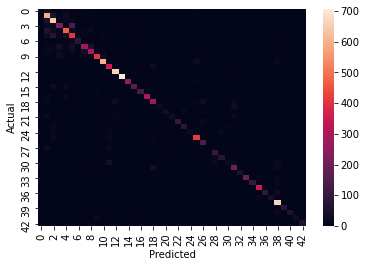

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.64      0.83      0.72       720
           2       0.68      0.85      0.76       750
           3       0.61      0.50      0.55       450
           4       0.70      0.71      0.71       660
           5       0.58      0.64      0.61       630
           6       0.77      0.53      0.63       150
           7       0.73      0.61      0.67       450
           8       0.71      0.68      0.70       450
           9       0.91      0.85      0.88       480
          10       0.83      0.91      0.87       660
          11       0.76      0.87      0.81       420
          12       0.92      0.96      0.94       690
          13       0.92      0.98      0.95       720
          14       0.98      0.94      0.96       270
          15       0.75      0.78      0.76       210
          16       0.91      0.86      0.89       150
          17       0.99    

In [7]:
lg=LogisticRegression(C=0.009,multi_class="multinomial",class_weight=None, dual=False,fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5, n_jobs=None,penalty='l2', random_state=1000, solver='saga', tol=0.0001,
                   verbose=1, warm_start=False)
lg.fit(X,y)
y_pred1=lg.predict(X)
y_pred2=lg.predict(X_test)

#Confusion Matrix for model logistic Regression

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data = {'y_Actual':np.array(label),
        'y_Predicted':y_pred2}
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix)
plt.show()

#For classification report

from sklearn.metrics import classification_report
print(classification_report(label,y_pred2))

# Accuracy:
print("Traning Accuracy:",accuracy_score(y, y_pred1))
print("Testing Accuracy:",accuracy_score(label, y_pred2))


In [8]:
#For classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.34      0.46       210
           1       0.81      0.90      0.85      2220
           2       0.81      0.88      0.84      2250
           3       0.81      0.72      0.76      1410
           4       0.82      0.91      0.86      1980
           5       0.76      0.74      0.75      1860
           6       0.83      0.78      0.80       420
           7       0.86      0.81      0.83      1440
           8       0.84      0.79      0.81      1410
           9       0.94      0.91      0.93      1470
          10       0.87      0.96      0.91      2010
          11       0.86      0.93      0.89      1320
          12       0.93      0.98      0.96      2100
          13       0.93      0.97      0.95      2160
          14       0.97      0.96      0.97       780
          15       0.84      0.87      0.85       630
          16       0.96      0.87      0.92       420
          17       0.97    

In [9]:
#Cross-Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lg,X,y, cv=10)
print("Avg accuracy: {}".format(scores.mean()))
print("Standard deviation of accuracy: {}".format(scores.std()))
print("Summary",pd.Series(scores).describe())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 247 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 222 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 272 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 302 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 284 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 268 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 231 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 142 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 124 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 129 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished


Avg accuracy: 0.7776531978514436
Standard deviation of accuracy: 0.026590991932490628
Summary count    10.000000
mean      0.777653
std       0.028029
min       0.733996
25%       0.756312
50%       0.780640
75%       0.793866
max       0.829380
dtype: float64


## ExtraTreess Model:

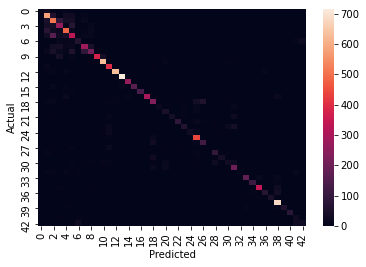

              precision    recall  f1-score   support

           0       1.00      0.20      0.33        60
           1       0.65      0.81      0.72       720
           2       0.53      0.68      0.60       750
           3       0.50      0.59      0.54       450
           4       0.65      0.73      0.69       660
           5       0.51      0.53      0.52       630
           6       0.62      0.44      0.52       150
           7       0.64      0.63      0.63       450
           8       0.63      0.47      0.54       450
           9       0.94      0.79      0.86       480
          10       0.88      0.95      0.92       660
          11       0.80      0.95      0.87       420
          12       0.96      0.91      0.94       690
          13       0.96      1.00      0.98       720
          14       0.96      0.99      0.98       270
          15       0.98      0.80      0.88       210
          16       0.99      0.91      0.95       150
          17       0.99    

In [16]:
#ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(X,y)
y_pred1=ET.predict(X)
y_pred2=ET.predict(X_test)

#Confusion Matrix for model ExtraTreesClassifier

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data = {'y_Actual':np.array(label),
        'y_Predicted':y_pred2}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix)
plt.show()

#For classification report
from sklearn.metrics import classification_report
print(classification_report(label,y_pred2))

# Accuracy:
print("Traning Accuracy:",accuracy_score(y, y_pred1))
print("Testing Accuracy:",accuracy_score(label, y_pred2))


In [17]:
#For classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00      2220
           2       1.00      1.00      1.00      2250
           3       1.00      1.00      1.00      1410
           4       1.00      1.00      1.00      1980
           5       1.00      1.00      1.00      1860
           6       1.00      1.00      1.00       420
           7       1.00      1.00      1.00      1440
           8       1.00      1.00      1.00      1410
           9       1.00      1.00      1.00      1470
          10       1.00      1.00      1.00      2010
          11       1.00      1.00      1.00      1320
          12       1.00      1.00      1.00      2100
          13       1.00      1.00      1.00      2160
          14       1.00      1.00      1.00       780
          15       1.00      1.00      1.00       630
          16       1.00      1.00      1.00       420
          17       1.00    

In [18]:
#Cross-Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(ET,X,y, cv=10)
print("Avg accuracy: {}".format(scores.mean()))
print("Standard deviation of accuracy: {}".format(scores.std()))
print(pd.Series(scores).describe())

Avg accuracy: 0.7655386224880159
Standard deviation of accuracy: 0.04590659207745157
count    10.000000
mean      0.765539
std       0.048390
min       0.647284
25%       0.756121
50%       0.769545
75%       0.792081
max       0.828360
dtype: float64


## Random Forest Model:

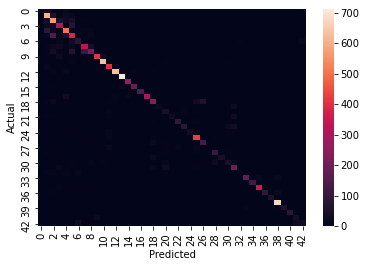

              precision    recall  f1-score   support

           0       1.00      0.20      0.33        60
           1       0.69      0.85      0.76       720
           2       0.60      0.76      0.67       750
           3       0.62      0.69      0.65       450
           4       0.69      0.77      0.73       660
           5       0.55      0.62      0.58       630
           6       0.64      0.50      0.56       150
           7       0.67      0.73      0.70       450
           8       0.68      0.47      0.55       450
           9       0.93      0.86      0.89       480
          10       0.91      0.96      0.93       660
          11       0.85      0.95      0.89       420
          12       0.97      0.92      0.94       690
          13       0.95      0.99      0.97       720
          14       0.96      1.00      0.98       270
          15       0.94      0.89      0.91       210
          16       1.00      0.95      0.97       150
          17       0.99    

In [16]:
#RandomForestClassifier
RF=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=99,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
RF.fit(X,y)
y_pred1=RF.predict(X)
y_pred2=RF.predict(X_test)

#Confusion Matrix for model RandomForestClassifier
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data = {'y_Actual':np.array(label),
        'y_Predicted':y_pred2}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix)
plt.show()

#For classification report
from sklearn.metrics import classification_report
print(classification_report(label,y_pred2))

# Accuracy:
print("Traning Accuracy:",accuracy_score(y, y_pred1))
print("Testing Accuracy:",accuracy_score(label, y_pred2))


In [17]:
#For classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00      2220
           2       1.00      1.00      1.00      2250
           3       1.00      1.00      1.00      1410
           4       1.00      1.00      1.00      1980
           5       1.00      1.00      1.00      1860
           6       1.00      1.00      1.00       420
           7       1.00      1.00      1.00      1440
           8       1.00      1.00      1.00      1410
           9       1.00      1.00      1.00      1470
          10       1.00      1.00      1.00      2010
          11       1.00      1.00      1.00      1320
          12       1.00      1.00      1.00      2100
          13       1.00      1.00      1.00      2160
          14       1.00      1.00      1.00       780
          15       1.00      1.00      1.00       630
          16       1.00      1.00      1.00       420
          17       1.00    

In [18]:
#Cross-Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF,X,y, cv=10)
print("Avg accuracy: {}".format(scores.mean()))
print("Standard deviation of accuracy: {}".format(scores.std()))
print(pd.Series(scores).describe())

Avg accuracy: 0.7958380176860338
Standard deviation of accuracy: 0.04530875400253529
count    10.000000
mean      0.795838
std       0.047760
min       0.678398
25%       0.782581
50%       0.805382
75%       0.820581
max       0.857689
dtype: float64


## Decision Tree Model:

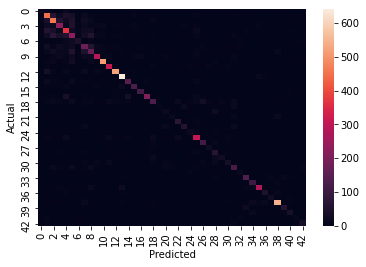

              precision    recall  f1-score   support

           0       0.27      0.28      0.28        60
           1       0.56      0.62      0.59       720
           2       0.55      0.61      0.58       750
           3       0.45      0.50      0.47       450
           4       0.51      0.56      0.53       660
           5       0.35      0.37      0.36       630
           6       0.41      0.31      0.35       150
           7       0.34      0.40      0.37       450
           8       0.35      0.37      0.36       450
           9       0.69      0.60      0.64       480
          10       0.81      0.78      0.79       660
          11       0.74      0.74      0.74       420
          12       0.84      0.76      0.80       690
          13       0.82      0.89      0.85       720
          14       0.63      0.54      0.58       270
          15       0.60      0.62      0.61       210
          16       0.72      0.75      0.74       150
          17       0.88    

In [20]:
#DecisionTreeClassifier

DT=DecisionTreeClassifier()
DT.fit(X,y)
y_pred1=DT.predict(X)
y_pred2=DT.predict(X_test)

#Confusion Matrix for model RandomForestClassifier
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data = {'y_Actual':np.array(label),
        'y_Predicted':y_pred2}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix)
plt.show()

#For classification report
from sklearn.metrics import classification_report
print(classification_report(label,y_pred2))

# Accuracy:
print("Traning Accuracy:",accuracy_score(y, y_pred1))
print("Testing Accuracy:",accuracy_score(label, y_pred2))

In [21]:
#For classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00      2220
           2       1.00      1.00      1.00      2250
           3       1.00      1.00      1.00      1410
           4       1.00      1.00      1.00      1980
           5       1.00      1.00      1.00      1860
           6       1.00      1.00      1.00       420
           7       1.00      1.00      1.00      1440
           8       1.00      1.00      1.00      1410
           9       1.00      1.00      1.00      1470
          10       1.00      1.00      1.00      2010
          11       1.00      1.00      1.00      1320
          12       1.00      1.00      1.00      2100
          13       1.00      1.00      1.00      2160
          14       1.00      1.00      1.00       780
          15       1.00      1.00      1.00       630
          16       1.00      1.00      1.00       420
          17       1.00    

In [22]:
#Cross-Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(DT,np.array(X),y, cv=10)
print("Avg accuracy: {}".format(scores.mean()))    
print("Standard deviation of accuracy: {}".format(scores.std()))
print(pd.Series(scores).describe())

Avg accuracy: 0.5803261025144565
Standard deviation of accuracy: 0.03695118772848424
count    10.000000
mean      0.580326
std       0.038950
min       0.484570
25%       0.571347
50%       0.588573
75%       0.608008
max       0.615914
dtype: float64


## KNeighbors Model:

In [ ]:
#KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=8)
KNN.fit(X,y)
y_pred1=KNN.predict(X)
y_pred2=KNN.predict(X_test)

#Confusion Matrix for model RandomForestClassifier
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data = {'y_Actual':np.array(label),
        'y_Predicted':y_pred2}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix)
plt.show()

#For classification report
from sklearn.metrics import classification_report
print(classification_report(label,y_pred2))

# Accuracy:
print("Traning Accuracy:",accuracy_score(y, y_pred1))
print("Testing Accuracy:",accuracy_score(label, y_pred2))

In [ ]:
#For classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred1))

In [ ]:
#Cross-Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN,X,y, cv=10)
print("Avg accuracy: {}".format(scores.mean()))    
print("Standard deviation of accuracy: {}".format(scores.std()))
print(pd.Series(scores).describe())

## Bagging Classifire Model:

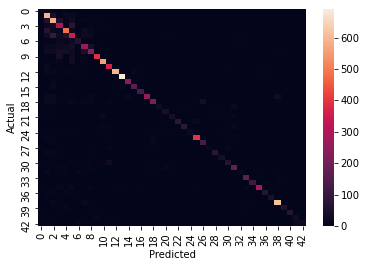

              precision    recall  f1-score   support

           0       0.50      0.32      0.39        60
           1       0.59      0.82      0.69       720
           2       0.56      0.77      0.65       750
           3       0.48      0.66      0.56       450
           4       0.63      0.73      0.68       660
           5       0.49      0.56      0.52       630
           6       0.54      0.40      0.46       150
           7       0.55      0.58      0.57       450
           8       0.53      0.51      0.52       450
           9       0.87      0.81      0.84       480
          10       0.87      0.84      0.85       660
          11       0.81      0.87      0.83       420
          12       0.94      0.86      0.90       690
          13       0.92      0.96      0.94       720
          14       0.94      0.87      0.90       270
          15       0.83      0.80      0.81       210
          16       0.87      0.84      0.85       150
          17       0.97    

In [8]:
#BaggingClassifier
BC=BaggingClassifier()
BC.fit(X,y)
y_pred1=BC.predict(X)
y_pred2=BC.predict(X_test)

#Confusion Matrix for model RandomForestClassifier
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data = {'y_Actual':np.array(label),
        'y_Predicted':y_pred2}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix)
plt.show()

#For classification report
from sklearn.metrics import classification_report
print(classification_report(label,y_pred2))

# Accuracy:
print("Traning Accuracy:",accuracy_score(y, y_pred1))
print("Testing Accuracy:",accuracy_score(label, y_pred2))

In [9]:
#For classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       210
           1       1.00      1.00      1.00      2220
           2       1.00      1.00      1.00      2250
           3       1.00      1.00      1.00      1410
           4       1.00      1.00      1.00      1980
           5       1.00      1.00      1.00      1860
           6       1.00      1.00      1.00       420
           7       1.00      1.00      1.00      1440
           8       1.00      1.00      1.00      1410
           9       1.00      1.00      1.00      1470
          10       1.00      1.00      1.00      2010
          11       1.00      1.00      1.00      1320
          12       1.00      1.00      1.00      2100
          13       1.00      1.00      1.00      2160
          14       1.00      1.00      1.00       780
          15       1.00      1.00      1.00       630
          16       1.00      1.00      1.00       420
          17       1.00    

In [11]:
#Cross-Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(BC,X,y, cv=10)
print("Avg accuracy: {}".format(scores.mean()))    
print("Standard deviation of accuracy: {}".format(scores.std()))
print(pd.Series(scores).describe())

Avg accuracy: 0.6275345555334049
Standard deviation of accuracy: 0.0023879092696966198
count    2.000000
mean     0.627535
std      0.003377
min      0.625147
25%      0.626341
50%      0.627535
75%      0.628729
max      0.629922
dtype: float64


## Support vector Machine:

In [ ]:
# SVM

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
steps=[('scaler',StandardScaler()),
      ('SVM',SVC())]
pipeline=Pipeline(steps)
svc_scaled=pipeline.fit(X,y)
#print('Acuuracy with scaling',format(svc_scaled.score(X_test,Y_test)))
y_pred1=svc_scaled.predict(X)
y_pred2=svc_scaled.predict(X_test)

#Confusion Matrix for model SVM scaled
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
data = {'y_Actual':label,
        'y_Predicted':y_pred2}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix)
plt.show()

#For classification report
from sklearn.metrics import classification_report
print(classification_report(label,y_pred2))

# Accuracy:
print("Traning Accuracy:",accuracy_score(y, y_pred1))
print("Testing Accuracy:",accuracy_score(label, y_pred2))

In [ ]:
#For classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred1))

In [ ]:
#Cross-Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc_scaled,X,y, cv=10)
print("Avg accuracy: {}".format(scores.mean()))    
print("Standard deviation of accuracy: {}".format(scores.std()))
print(pd.Series(scores).describe())

# Save the model

In [ ]:
try:
    os.mkdir('Model')
    os.mkdir('Backend')
except:
    print("Directory Already exist.")
model.save("./Model/TrafficSignModel.h5")
model.save("./Backend/TrafficSignModel.h5")

In [ ]:
# Load the model using keras

In [5]:
from keras.models import load_model
model = load_model('./Model/TrafficSignModel.h5')

In [ ]:
# Class of Traffic Signs

In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

In [ ]:
new_path = os.getcwd()
path = os.path.join(new_path,'Test','09329.png')

In [ ]:
plot,prediction = test_on_img(path)
s = [str(i) for i in prediction] 
a = int("".join(s)) 

In [ ]:
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()